In [129]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [130]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online%20Retail.xlsx'
df = pd.read_excel("Online Retail.xlsx")

In [131]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [132]:
df.shape

(541909, 8)

In [133]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [134]:
# Delete rows with missing CustomerID
df = df.drop(df[df['CustomerID'].isnull()].index).reset_index(drop=True)

In [135]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406829 entries, 0 to 406828
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      406829 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 24.8+ MB


In [136]:
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn import utils
labelencoder = LabelEncoder()

In [137]:
df['InvoiceNo'] = df['InvoiceNo'].astype(str)
df['StockCode'] = df['StockCode'].astype(str)
df['Description'] = df['Description'].astype(str)
df['Description'] = df['Description'].str.strip()
df['CustomerID'] = df['CustomerID'].astype(int)

In [138]:
df['InvoiceNo'] = labelencoder.fit_transform(df['InvoiceNo'])


In [139]:
df.head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,0,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,0,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom


In [140]:
# Check duplicates values 
products = df.groupby(['StockCode','Description'],as_index=False).count()
products = products.loc[:,['StockCode','Description']]
stockCount = products['StockCode'].value_counts()
stockList = list(stockCount[stockCount > 1].index) #List of stockCode with more than 1 Description
products[products['StockCode'].isin(stockList)].head(10)

,StockCode,Description
42,16156L,WRAP CAROUSEL
43,16156L,"WRAP, CAROUSEL"
101,17107D,FLOWER FAIRY 5 DRAWER LINERS
102,17107D,FLOWER FAIRY 5 SUMMER DRAW LINERS
103,17107D,"FLOWER FAIRY,5 SUMMER B'DRAW LINERS"
121,20622,VIP PASSPORT COVER
122,20622,VIPPASSPORT COVER
174,20725,LUNCH BAG RED RETROSPOT
175,20725,LUNCH BAG RED SPOTTY
267,20914,SET/5 RED RETROSPOT LID GLASS BOWLS


In [141]:
df.drop_duplicates(subset='StockCode',keep='first')

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,0,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,0,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,0,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,0,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
...,...,...,...,...,...,...,...,...
397681,18143,90214U,"LETTER ""U"" BLING KEY RING",12,2011-12-05 15:48:00,0.29,13790,United Kingdom
397683,18143,90214W,"LETTER ""W"" BLING KEY RING",12,2011-12-05 15:48:00,0.29,13790,United Kingdom
397685,18143,90214Z,"LETTER ""Z"" BLING KEY RING",12,2011-12-05 15:48:00,0.29,13790,United Kingdom
399525,18206,90089,PINK CRYSTAL SKULL PHONE CHARM,12,2011-12-06 11:58:00,0.19,17914,United Kingdom


In [142]:
df = df.drop(df[(df['StockCode'].str.len())<5].index).reset_index(drop=True)

In [143]:
df[df['Quantity']< 1].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
152,18537,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311,United Kingdom
233,18538,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548,United Kingdom
234,18538,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548,United Kingdom
235,18538,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548,United Kingdom
236,18538,21980,PACK OF 12 RED RETROSPOT TISSUES,-24,2010-12-01 10:24:00,0.29,17548,United Kingdom


In [144]:
df.shape

(404921, 8)

In [145]:
# Add new column 
df['CancelledOrder'] = df['InvoiceNo'].astype(str).str.startswith('C').astype('int')
df['InternationalOrders'] = (df['Country']!='United Kingdom').astype('int')
df['Sales'] = df['Quantity']*df['UnitPrice']

In [146]:
df.shape

(404921, 11)

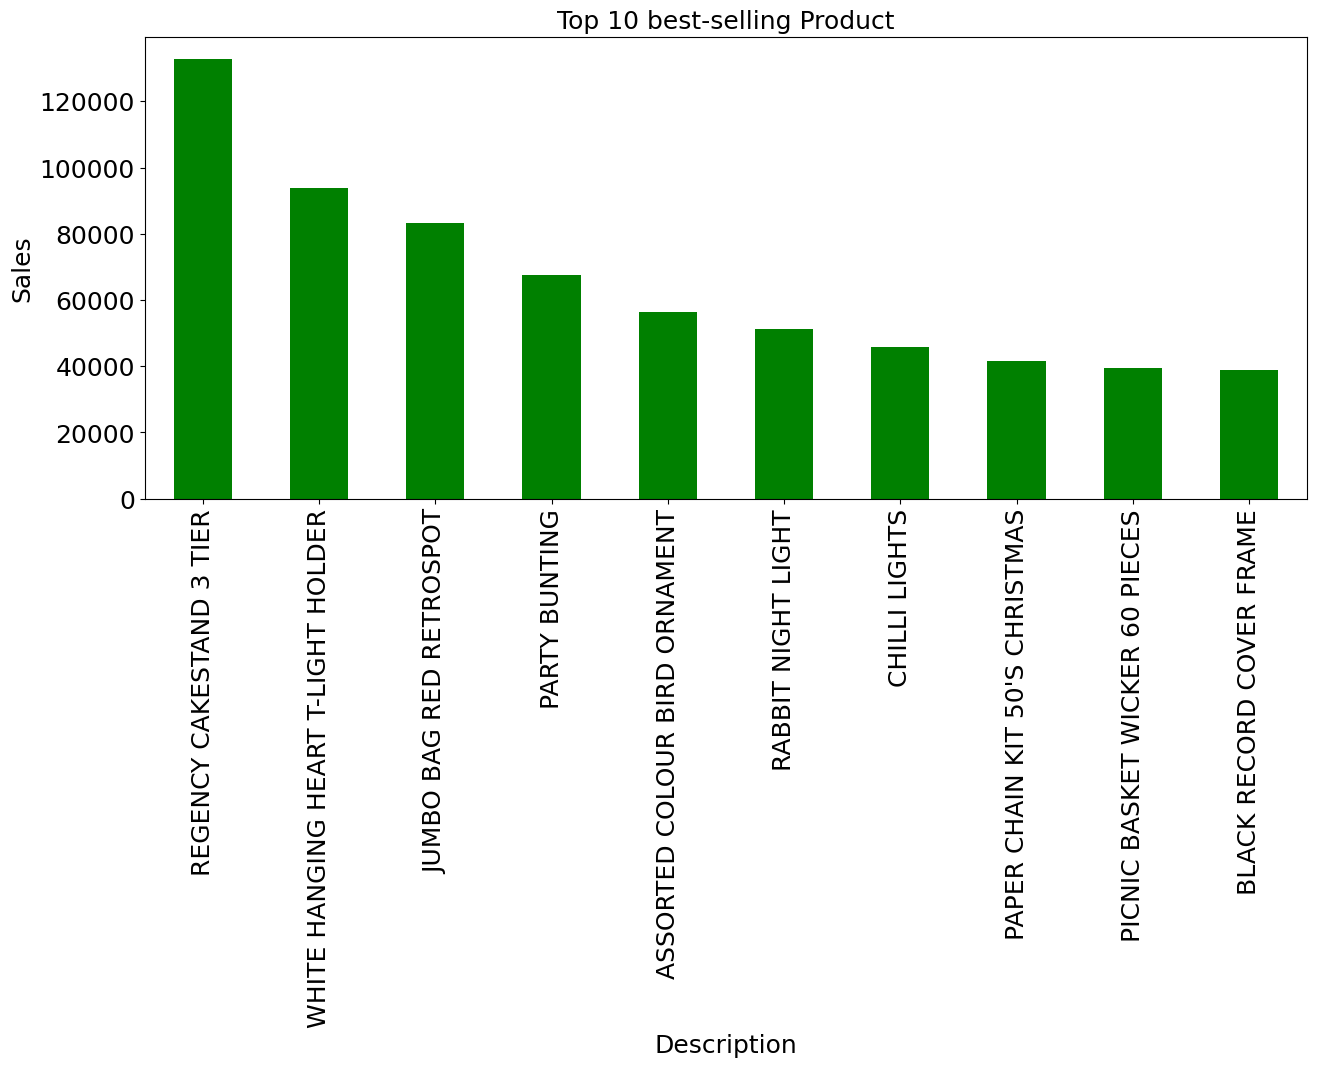

In [147]:

Top10products = df.groupby('Description',as_index=False)['Sales'].sum().sort_values('Sales',ascending=False).head(10)
ax = Top10products.plot(x="Description",
                   y="Sales", 
                   legend=False,
                   kind='bar',
                   color="green",
                   figsize= (15,6))

plt.grid(False)


plt.xlabel('Description',fontsize=18)
plt.ylabel('Sales', fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.title('Top 10 best-selling Product', fontsize=18)

plt.show()

In [148]:
Top10products

,Description,Sales
2762,REGENCY CAKESTAND 3 TIER,132870.40
3698,WHITE HANGING HEART T-LIGHT HOLDER,93823.85
1756,JUMBO BAG RED RETROSPOT,83236.76
2339,PARTY BUNTING,67687.53
207,ASSORTED COLOUR BIRD ORNAMENT,56499.22
2650,RABBIT NIGHT LIGHT,51137.80
713,CHILLI LIGHTS,45936.81
2308,PAPER CHAIN KIT 50'S CHRISTMAS,41500.48
2389,PICNIC BASKET WICKER 60 PIECES,39619.50
365,BLACK RECORD COVER FRAME,39009.38


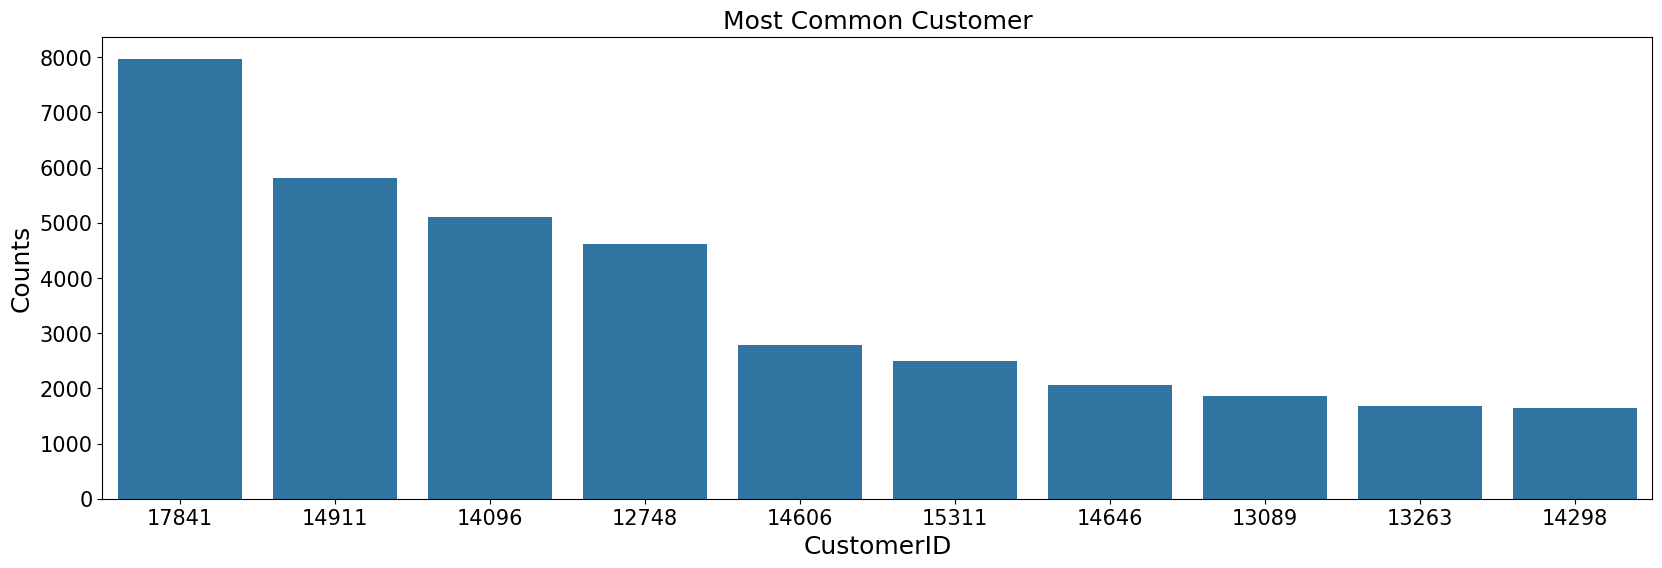

In [149]:
Top10customer = df['CustomerID'].value_counts().sort_values(ascending=False).head(10)
plt.figure(figsize=(20,6))
plt.grid(False)
X =Top10customer.index
Y = Top10customer.values
sns.barplot(x=X, 
            y=Y, 
            order=Top10customer.index)
plt.ylabel("Counts",fontsize = 18)
plt.xlabel("CustomerID",fontsize = 18)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title("Most Common Customer",fontsize = 18);

C:\Users\decen\AppData\Local\Temp\ipykernel_17832\3249694691.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  plots = sns.barplot(x=X,


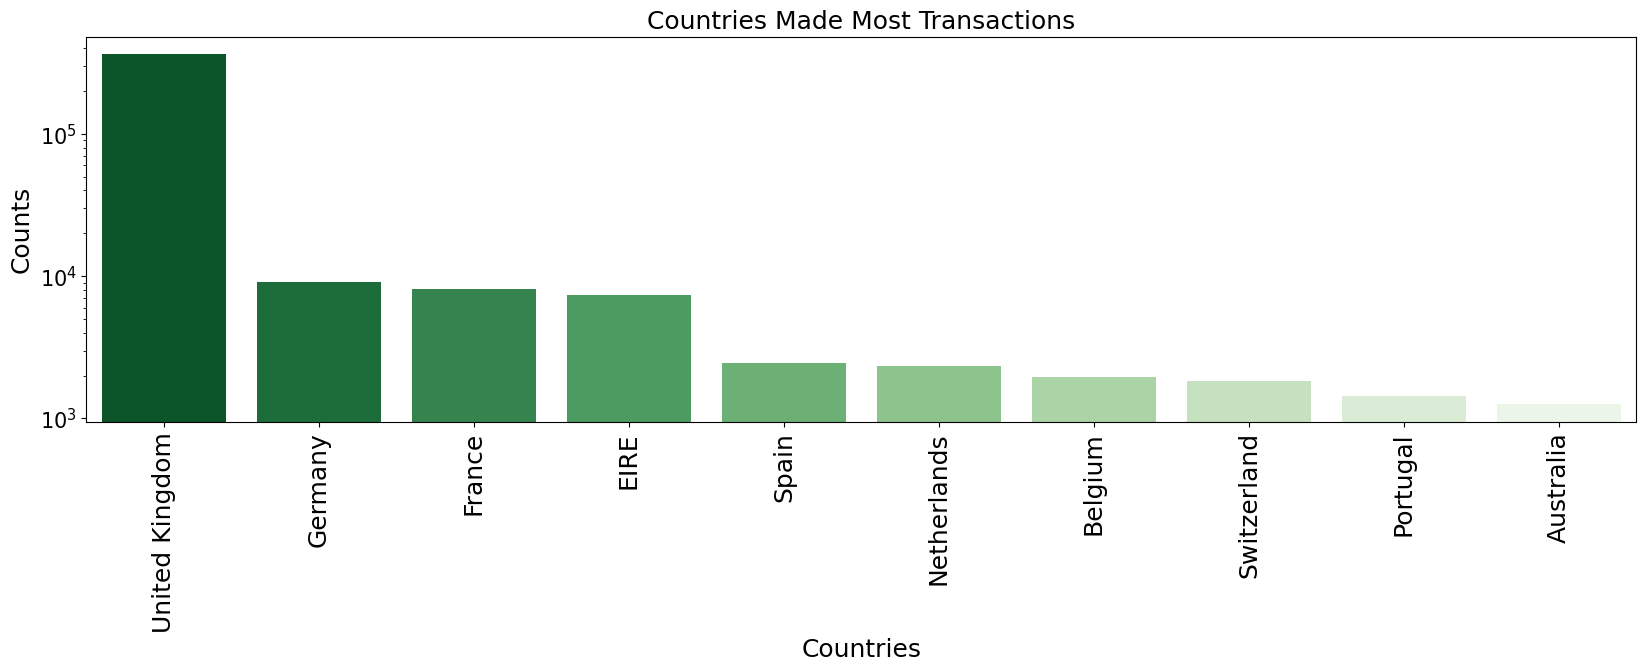

In [150]:
Top10country = df['Country'].value_counts().head(10)
plt.figure(figsize=(20,5))
X = Top10country.index
Y = Top10country.values
plots = sns.barplot(x=X, 
                    y=Y, 
                    palette="Greens_r")

plt.ylabel("Counts",fontsize = 18)
plt.xlabel("Countries",fontsize = 18)
plt.grid(False)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title("Countries Made Most Transactions",fontsize = 18);
plt.xticks(rotation=90, fontsize = 18);
plt.yscale("log")

In [151]:
Top10country

Country
United Kingdom    361267
Germany             9096
France              8168
EIRE                7380
Spain               2468
Netherlands         2330
Belgium             1971
Switzerland         1844
Portugal            1436
Australia           1257
Name: count, dtype: int64

In [152]:
df['Date']=df['InvoiceDate'].copy()

In [153]:
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y %H:%M:%S',errors ='coerce')
df.set_index('Date',inplace = True)
df.sort_index(inplace=True)
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,CancelledOrder,InternationalOrders,Sales
Date,,,,,,,,,,,
2010-12-01 08:26:00,0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,0,0,15.30
2010-12-01 08:26:00,0,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,0,0,20.34
2010-12-01 08:26:00,0,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,0,0,22.00
2010-12-01 08:26:00,0,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,0,0,20.34
2010-12-01 08:26:00,0,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,0,0,20.34


In [154]:
df['weekday_name']=df.index.strftime('%a')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,CancelledOrder,InternationalOrders,Sales,weekday_name
Date,,,,,,,,,,,,
2010-12-01 08:26:00,0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,0,0,15.30,Wed
2010-12-01 08:26:00,0,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,0,0,20.34,Wed
2010-12-01 08:26:00,0,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,0,0,22.00,Wed
2010-12-01 08:26:00,0,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,0,0,20.34,Wed
2010-12-01 08:26:00,0,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,0,0,20.34,Wed


In [155]:
Week_resample = df.resample('W').count()
Week_resample.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,CancelledOrder,InternationalOrders,Sales,weekday_name
Date,,,,,,,,,,,,
2010-12-05,7822,7822,7822,7822,7822,7822,7822,7822,7822,7822,7822,7822
2010-12-12,9811,9811,9811,9811,9811,9811,9811,9811,9811,9811,9811,9811
2010-12-19,7212,7212,7212,7212,7212,7212,7212,7212,7212,7212,7212,7212
2010-12-26,1890,1890,1890,1890,1890,1890,1890,1890,1890,1890,1890,1890
2011-01-02,0,0,0,0,0,0,0,0,0,0,0,0


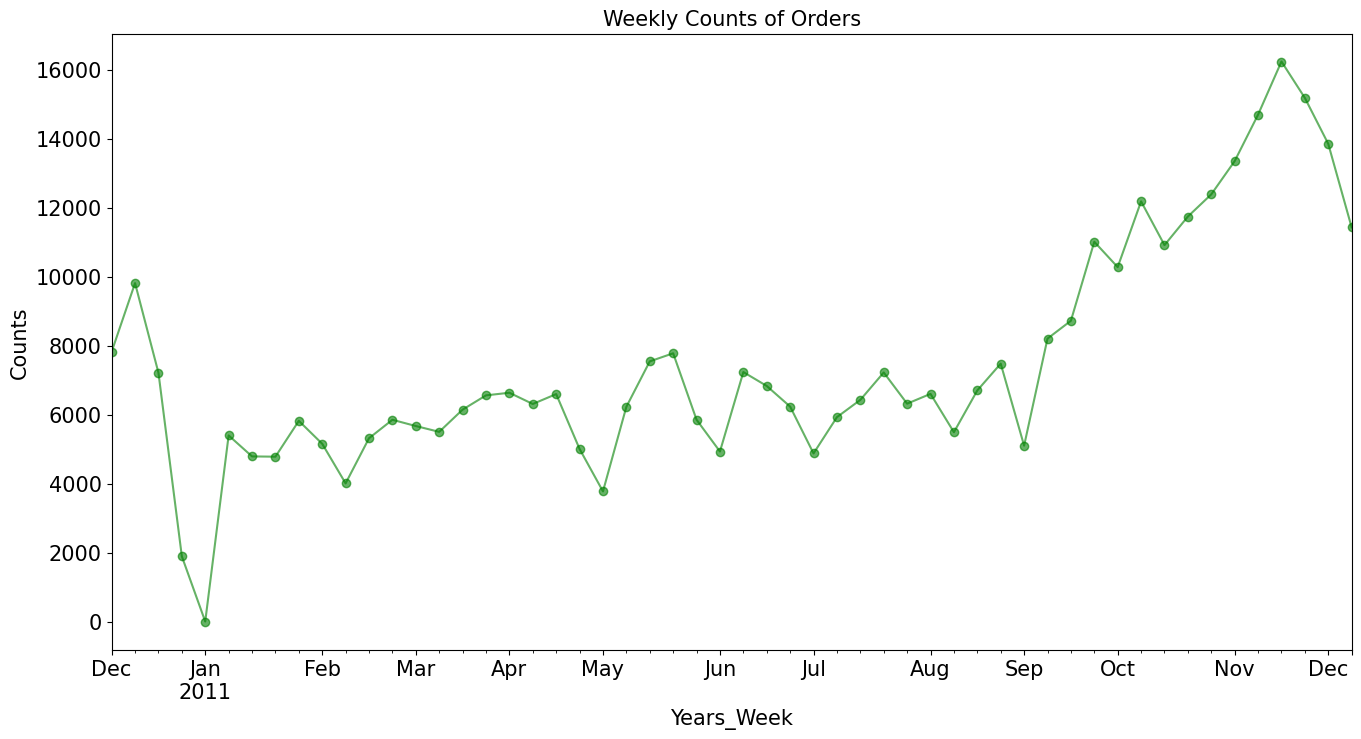

In [156]:
plt.figure(figsize = (16, 8))
Week_resample.Quantity.plot(color = 'green',marker = 'o',alpha = 0.6)
plt.grid(False)
plt.xlabel('Years_Week',fontsize=15)
plt.ylabel('Counts', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('Weekly Counts of Orders', fontsize=15)
plt.show()

In [157]:
Month_resample = df.resample('M').count()
Month_resample.head()

C:\Users\decen\AppData\Local\Temp\ipykernel_17832\2696102935.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  Month_resample = df.resample('M').count()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,CancelledOrder,InternationalOrders,Sales,weekday_name
Date,,,,,,,,,,,,
2010-12-31,26735,26735,26735,26735,26735,26735,26735,26735,26735,26735,26735,26735
2011-01-31,21808,21808,21808,21808,21808,21808,21808,21808,21808,21808,21808,21808
2011-02-28,20266,20266,20266,20266,20266,20266,20266,20266,20266,20266,20266,20266
2011-03-31,27666,27666,27666,27666,27666,27666,27666,27666,27666,27666,27666,27666
2011-04-30,23087,23087,23087,23087,23087,23087,23087,23087,23087,23087,23087,23087


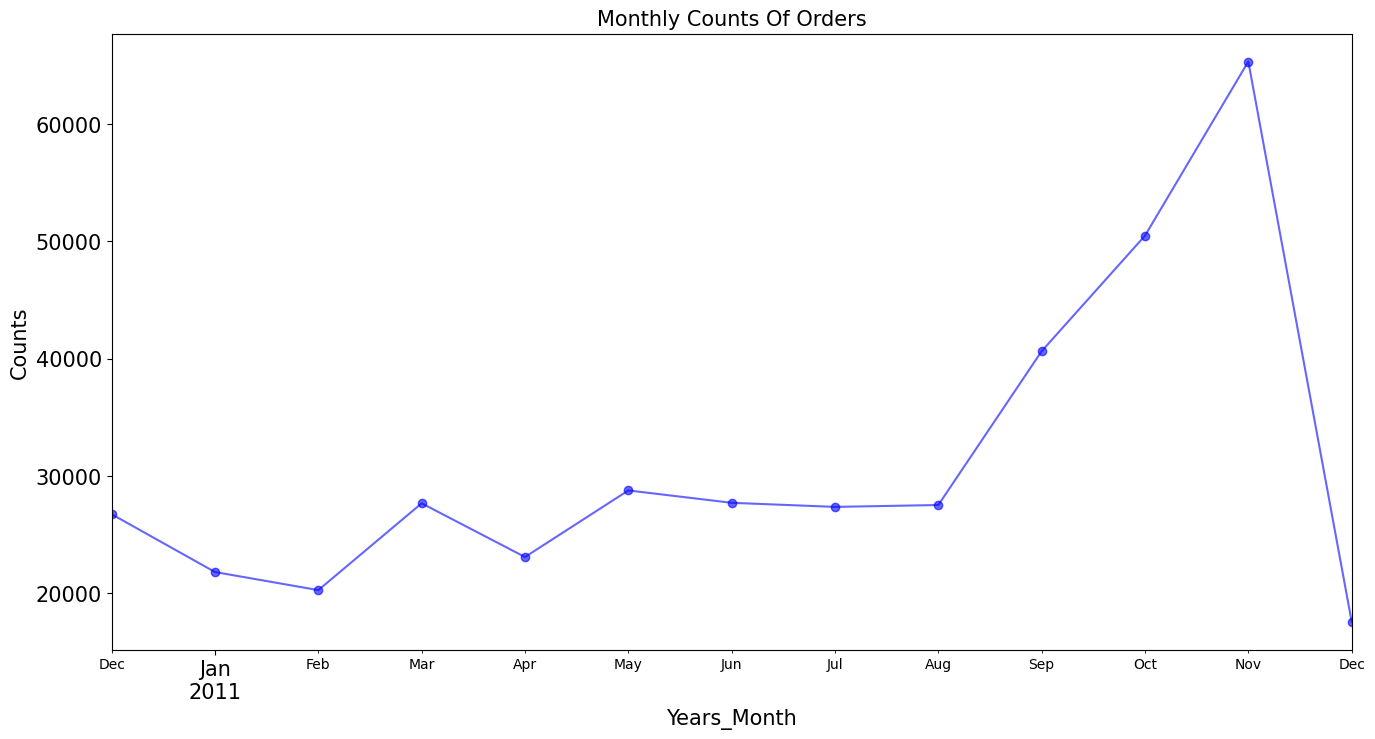

In [158]:
plt.figure(figsize = (16, 8))
Month_resample.Quantity.plot(color = 'blue',marker = 'o',alpha = 0.6)
plt.xlabel('Years_Month',fontsize=15)
plt.ylabel('Counts', fontsize=15)
plt.grid(False)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('Monthly Counts Of Orders', fontsize=15)
plt.show()

In [159]:
Day_resample = df.resample('D').count()
Day_resample.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,CancelledOrder,InternationalOrders,Sales,weekday_name
Date,,,,,,,,,,,,
2010-12-01,1961,1961,1961,1961,1961,1961,1961,1961,1961,1961,1961,1961
2010-12-02,2043,2043,2043,2043,2043,2043,2043,2043,2043,2043,2043,2043
2010-12-03,1107,1107,1107,1107,1107,1107,1107,1107,1107,1107,1107,1107
2010-12-04,0,0,0,0,0,0,0,0,0,0,0,0
2010-12-05,2711,2711,2711,2711,2711,2711,2711,2711,2711,2711,2711,2711


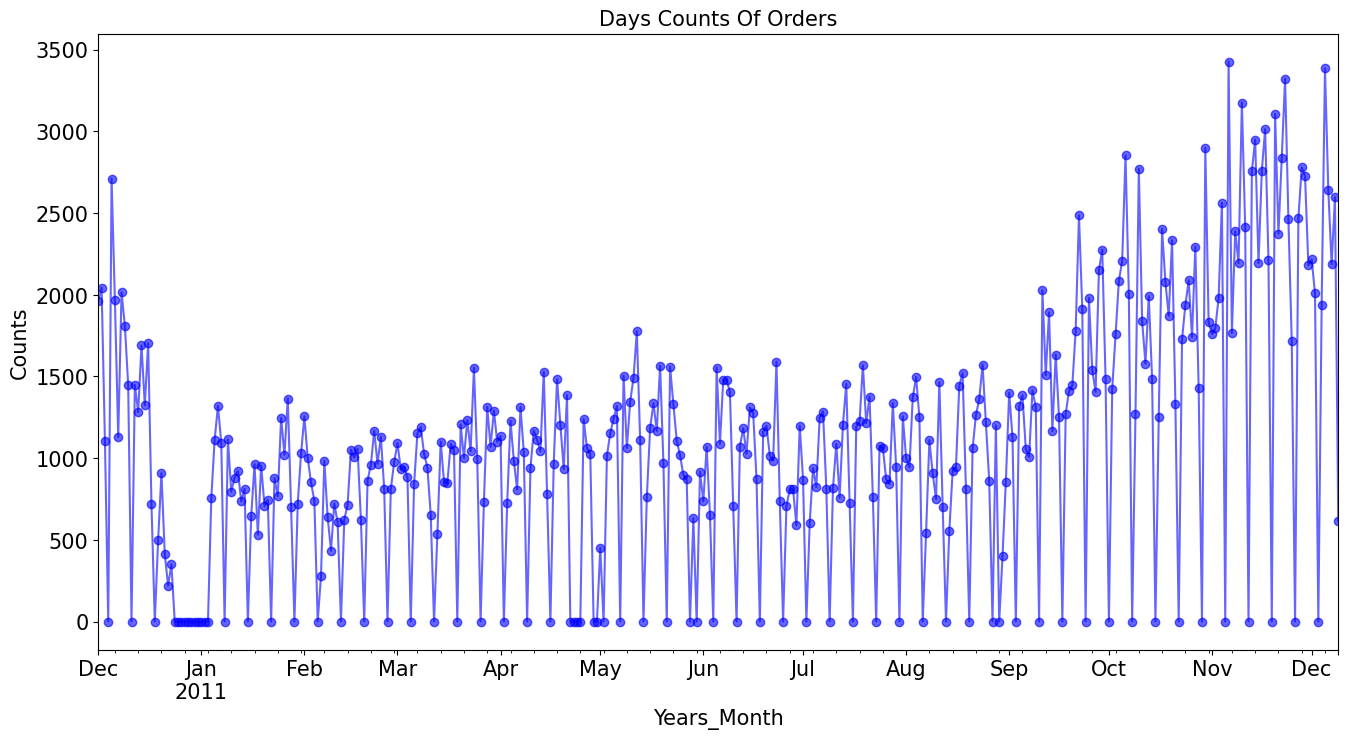

In [160]:
plt.figure(figsize = (16, 8))
Day_resample.Quantity.plot(color = 'blue',marker = 'o',alpha = 0.6)
plt.xlabel('Years_Month',fontsize=15)
plt.ylabel('Counts', fontsize=15)
plt.grid(False)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('Days Counts Of Orders', fontsize=15)
plt.show()

In [161]:
df.reset_index(drop = True,inplace = True)

In [162]:
# Convert InvoiceDate to datetime objec
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['InvoiceDate'].head()

0   2010-12-01 08:26:00
1   2010-12-01 08:26:00
2   2010-12-01 08:26:00
3   2010-12-01 08:26:00
4   2010-12-01 08:26:00
Name: InvoiceDate, dtype: datetime64[ns]

In [163]:
df['InvoiceDate'] = df['InvoiceDate'].dt.date

In [164]:
df.drop(['InvoiceNo', 'CustomerID','Country','InternationalOrders','Description','CancelledOrder','UnitPrice'],
            axis=1,inplace=True)

In [165]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], errors='coerce')
df['Week'] = df['InvoiceDate'].dt.isocalendar().week


In [166]:
# Drop duplicate labels from the DataFrame
df = df.loc[~df.index.duplicated(keep='first')]

df['year'] = pd.DatetimeIndex(df['InvoiceDate']).year
df['Month'] = pd.DatetimeIndex(df['InvoiceDate']).month
df['Quarter'] = pd.DatetimeIndex(df['InvoiceDate']).quarter
df['Week'] = df['InvoiceDate'].dt.isocalendar().week

df['Weekday'] = pd.DatetimeIndex(df['InvoiceDate']).weekday
df['Day'] = pd.DatetimeIndex(df['InvoiceDate']).day
df['Dayofyear'] = pd.DatetimeIndex(df['InvoiceDate']).dayofyear
df['UnitPrice'] = df['Sales']/df['Quantity']


In [167]:
df.head()

,StockCode,Quantity,InvoiceDate,Sales,weekday_name,Week,year,Month,Quarter,Weekday,Day,Dayofyear,UnitPrice
0,85123A,6,2010-12-01,15.30,Wed,48,2010,12,4,2,1,335,2.55
1,71053,6,2010-12-01,20.34,Wed,48,2010,12,4,2,1,335,3.39
2,84406B,8,2010-12-01,22.00,Wed,48,2010,12,4,2,1,335,2.75
3,84029G,6,2010-12-01,20.34,Wed,48,2010,12,4,2,1,335,3.39
4,84029E,6,2010-12-01,20.34,Wed,48,2010,12,4,2,1,335,3.39


In [168]:
# Drop rows with negative Quantity
from scipy import stats
df = df.drop(df[df.Quantity<=0].index).reset_index(drop=True)
df = df.drop(df[df.Sales<=0].index).reset_index(drop=True)

#Removing outliers 
df = df[(np.abs(stats.zscore(df['Quantity'])) < 3)]
df = df[(np.abs(stats.zscore(df['Sales'])) < 3)]

In [169]:
df.describe()

,Quantity,InvoiceDate,Sales,Week,year,Month,Quarter,Weekday,Day,Dayofyear,UnitPrice
count,393815.000000,393815,393815.000000,393815.0,393815.000000,393815.000000,393815.000000,393815.000000,393815.000000,393815.000000,393815.000000
mean,10.817567,2011-07-10 11:22:05.230374912,17.719122,30.973772,2010.934175,7.614669,2.856826,2.617686,15.044132,215.499915,2.847335
min,1.000000,2010-12-01 00:00:00,0.001000,1.0,2010.000000,1.000000,1.000000,0.000000,1.000000,4.000000,0.001000
25%,2.000000,2011-04-07 00:00:00,4.680000,19.0,2011.000000,5.000000,2.000000,1.000000,7.000000,130.000000,1.250000
50%,5.000000,2011-07-31 00:00:00,11.700000,34.0,2011.000000,8.000000,3.000000,2.000000,15.000000,240.000000,1.850000
75%,12.000000,2011-10-20 00:00:00,19.500000,44.0,2011.000000,11.000000,4.000000,4.000000,22.000000,310.000000,3.750000
max,504.000000,2011-12-09 00:00:00,266.400000,51.0,2011.000000,12.000000,4.000000,6.000000,31.000000,357.000000,195.000000
std,21.229162,NaN,26.139898,14.758586,0.247977,3.417132,1.121970,1.931095,8.655063,103.423112,3.677151


<Axes: >

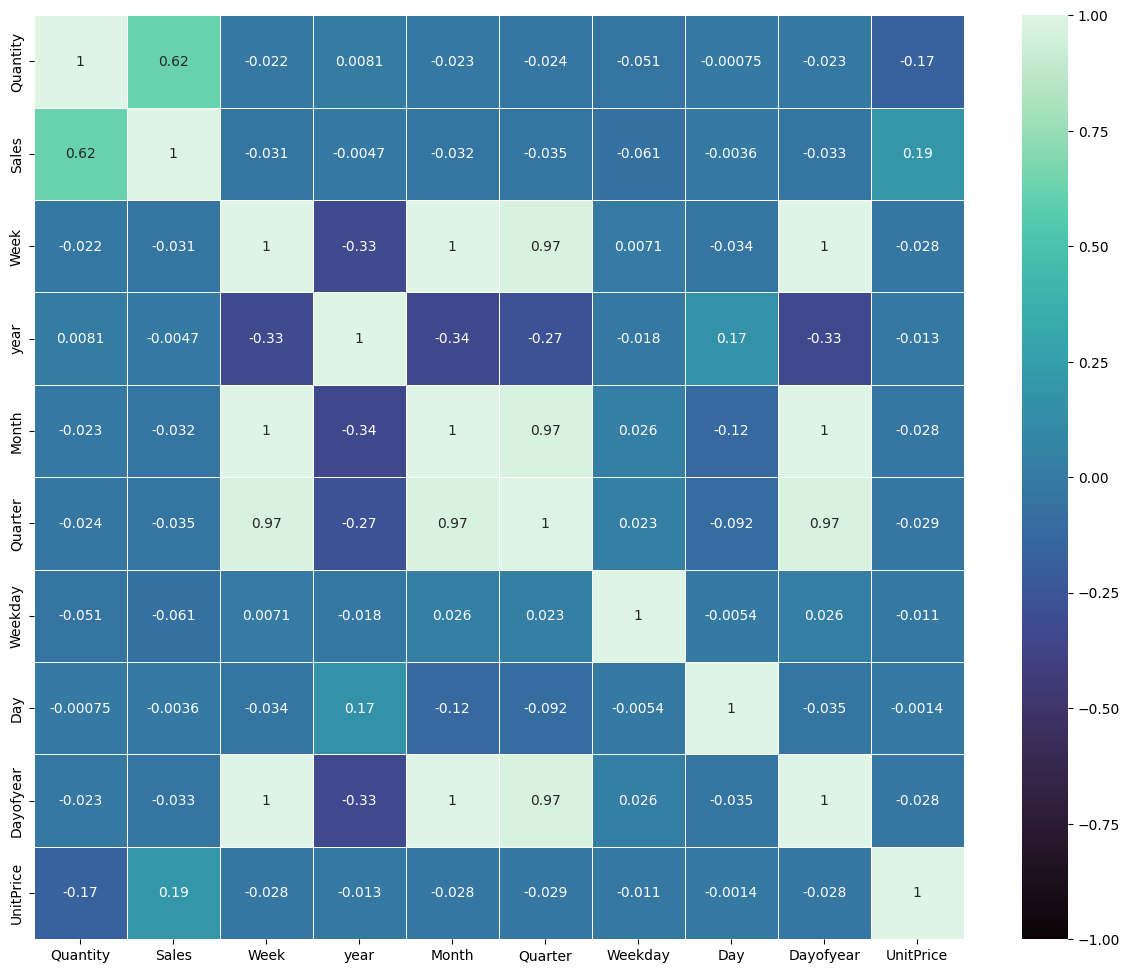

In [170]:
# correlation heatmap
fig, ax = plt.subplots(figsize=(15,12))
numeric_df = df.select_dtypes(include=[np.number])
analysis_data_corr = numeric_df.corr(method='pearson')
sns.heatmap(analysis_data_corr,
            cmap="mako",
            annot=True, 
            linewidths=.5,
            vmin=-1,
            vmax=1,
            center=0)

In [171]:
df.drop(['Month', 'Quarter','Dayofyear','year'], axis=1,inplace=True)

## Modelling

In [172]:
import datetime
      
startdate = datetime.datetime.strptime('2011-11-01', "%Y-%m-%d").date()
enddate = datetime.datetime.strptime('2011-11-01', "%Y-%m-%d").date()

In [173]:
# Split the dataset into train and test dataset

df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate']).dt.date
df_train = df[df['InvoiceDate'] < startdate]
df_test = df[df['InvoiceDate'] >= enddate]

In [174]:
df_train.shape

(312655, 9)

In [175]:
df_test.shape

(81160, 9)

In [176]:
df_train.head()

,StockCode,Quantity,InvoiceDate,Sales,weekday_name,Week,Weekday,Day,UnitPrice
0,85123A,6,2010-12-01,15.30,Wed,48,2,1,2.55
1,71053,6,2010-12-01,20.34,Wed,48,2,1,3.39
2,84406B,8,2010-12-01,22.00,Wed,48,2,1,2.75
3,84029G,6,2010-12-01,20.34,Wed,48,2,1,3.39
4,84029E,6,2010-12-01,20.34,Wed,48,2,1,3.39


In [177]:
X_train = df_train.drop(labels=['InvoiceDate','StockCode','Quantity','Sales','weekday_name'],axis=1)
y_train = df_train.Quantity

X_test = df_test.drop(labels=['InvoiceDate','StockCode','Quantity','Sales','weekday_name'],axis=1)
y_test = df_test.Quantity

In [178]:
X_train.keys()

Index(['Week', 'Weekday', 'Day', 'UnitPrice'], dtype='object')

In [179]:
X_test.keys()

Index(['Week', 'Weekday', 'Day', 'UnitPrice'], dtype='object')

In [180]:
score = pd.DataFrame()
score.index.name = 'Scoring'
score['Training+Test Time(sec)'] = None
time_Frame = []



## Linear Regression

In [181]:
reg = LinearRegression()
lr = reg.fit(X_train, y_train)
%time reg.fit(X_train, y_train)
pred_train_lr= lr.predict(X_train)

print("Train RMSE:",np.sqrt(mean_squared_error(y_train,pred_train_lr)))

%time reg.fit(X_test, y_test)
pred_test_lr= lr.predict(X_test)
print("Test RMSE:",np.sqrt(mean_squared_error(y_test,pred_test_lr))) 


CPU times: total: 46.9 ms
Wall time: 51.9 ms
Train RMSE: 21.54493882701568
CPU times: total: 0 ns
Wall time: 16.7 ms
Test RMSE: 18.09467122182692


In [182]:
score.loc['Linear Regression'] = 0.804
time_Frame.append(0.804)
score

,Training+Test Time(sec)
Scoring,
Linear Regression,0.804


## Ridge Regression

In [183]:
from sklearn.linear_model import Ridge
rr = Ridge(alpha=0.01)
%time rr.fit(X_train, y_train) 
%time rr.fit(X_test,y_test)

pred_train_rr= rr.predict(X_train)
print(" Train RMSE: ",np.sqrt(mean_squared_error(y_train,pred_train_rr)))

pred_test_rr= rr.predict(X_test)
print("Test RMSE:",np.sqrt(mean_squared_error(y_test,pred_test_rr))) 


CPU times: total: 31.2 ms
Wall time: 24.2 ms
CPU times: total: 15.6 ms
Wall time: 12 ms
 Train RMSE:  21.594879480946418
Test RMSE: 18.09467122182692


In [184]:
score.loc['Ridge Regression'] = 0.532
time_Frame.append(0.532)
score

,Training+Test Time(sec)
Scoring,
Linear Regression,0.804
Ridge Regression,0.532


# Lasso Regression

In [185]:
from sklearn.linear_model import Lasso
model_lasso = Lasso(alpha=0.01)
%time model_lasso.fit(X_train, y_train) 
%time model_lasso.fit(X_test, y_test) 
pred_train_lasso= model_lasso.predict(X_train)
print(" Train RMSE:",np.sqrt(mean_squared_error(y_train,pred_train_lasso)))


pred_test_lasso= model_lasso.predict(X_test)
print("Test RSME:",np.sqrt(mean_squared_error(y_test,pred_test_lasso))) 

CPU times: total: 93.8 ms
Wall time: 78 ms
CPU times: total: 31.2 ms
Wall time: 31.1 ms
 Train RMSE: 21.597256174888194
Test RSME: 18.094674085192526


In [186]:
score.loc['Lasso Regression'] =0.843
time_Frame.append(0.843)
score

,Training+Test Time(sec)
Scoring,
Linear Regression,0.804
Ridge Regression,0.532
Lasso Regression,0.843


### Random  Forest

In [187]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 50, random_state = 0)
%time regressor.fit(X_train, y_train)
%time regressor.fit(X_test, y_test)
y_pred_train = regressor.predict(X_train)
print('Train RSME :', np.sqrt(mean_squared_error(y_train, y_pred_train)))


y_pred_test = regressor.predict(X_test)
print('Test RSME :', np.sqrt(mean_squared_error(y_test, y_pred_test)))

CPU times: total: 24 s
Wall time: 24.6 s
CPU times: total: 2.98 s
Wall time: 3.11 s
Train RSME : 18.80988939180469
Test RSME : 13.879575489077013


In [188]:
score.loc['Random Forest'] = 0.3817
time_Frame.append(0.381)
score

,Training+Test Time(sec)
Scoring,
Linear Regression,0.8040
Ridge Regression,0.5320
Lasso Regression,0.8430
Random Forest,0.3817


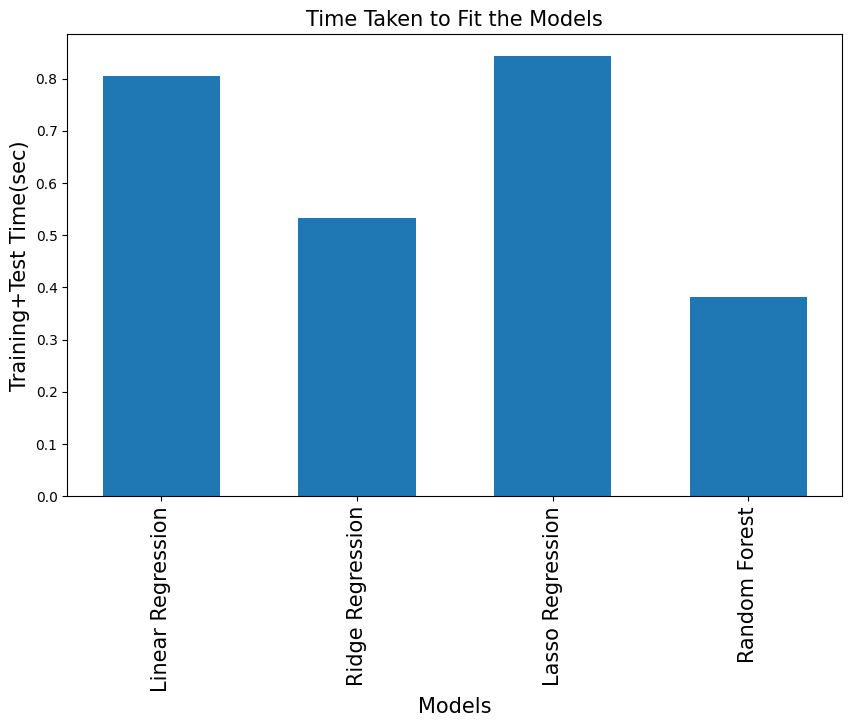

In [189]:
fig=plt.figure(figsize=(10, 6))
#axes=fig.add_subplot(1, 1, 1)
labels = score.index
plt.bar(data=score, height='Training+Test Time(sec)', 
        x=np.array(range(score.shape[0])), 
        width=0.6)

plt.xticks(np.array(range(score.shape[0])), labels, rotation=90,fontsize = 15)
plt.xlabel('Models',fontsize = 15)
plt.ylabel('Training+Test Time(sec)',fontsize = 15)
plt.title('Time Taken to Fit the Models',fontsize = 15)
plt.show()